In [63]:
using Revise, DataFrames, Glob, Random, Pipe, ProgressMeter, CSV, Plots
include("../functions/type-defs.jl")
include("../functions/optim-functions.jl");
include("../functions/expected-utility-functions.jl")
include("../functions/sim-landscape-functions.jl")

fcn_evaluate_ef (generic function with 1 method)

In [42]:
L = fcn_generate_landscape(yy = 10)

Landscape((40, 40), [0.0 0.0 … 59.17061963811522 0.0; 0.0 194.9986936542121 … 0.0 0.0; … ; 212.67141976083857 79.06995608488357 … 15.762160705462275 244.80405847076227; 0.0 0.9676048496322132 … 0.0 105.54511515513752], [0.0 0.0 … 59.17061963811522 0.0; 0.0 194.9986936542121 … 0.0 0.0; … ; 212.67141976083857 79.06995608488357 … 15.762160705462275 244.80405847076227; 0.0 0.9676048496322132 … 0.0 105.54511515513752], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.001988771461016082; 0.0003829996628163555 0.0 … 0.0 0.0007216754216724081; … ; 0.0 0.00045413631723701027 … 0.0 0.0; 0.0028078739870959785 0.0015647796533993514 … 0.0013255402112450044 0.001446304097534398])

In [73]:
dims = (40,40)
W, P, b = fcn_spatial_weights(dims; boundary = 1, distance = true, bandwidth = 20,  α=2);
W = W[b .== 0, b .== 0]

1600×1600 SparseMatrixCSC{Float64, Int64} with 1235740 stored entries:
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⣷⣷⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⣄⠀⠀⠀⠀⠀⠀⠀⠀
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⣄⠀⠀⠀⠀⠀⠀
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⣄⠀⠀⠀⠀
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⣄⠀⠀
⢽⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⣄
⠙⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣗
⠀⠀⠙⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⠀⠀⠀⠀⠙⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⠀⠀⠀⠀⠀⠀⠙⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⢿⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿

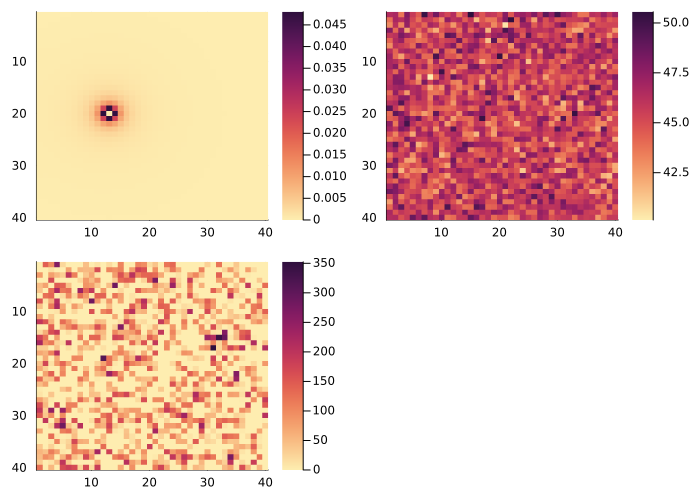

In [135]:
fcn_plot_heatmap = D -> D |> (x->fcn_reshape_lds(x, dims)) |>d->Plots.heatmap(d; colorbar=:best, yflip=true, dpi =600, size=(750,750), c = cgrad(:matter));
p1 = fcn_plot_heatmap(Vector(W[:, 500]));
p2 = fcn_plot_heatmap(mean(L.RV, dims = 2))
p3 = fcn_plot_heatmap(Vector(L.RV[:,10]));
Plots.plot(p1, p2, p3, size=(700,500), layout = (2,2))

In [144]:
out_mat = hcat(repeat(1:dims[1], inner=dims[2]), repeat(1:dims[1], outer=dims[2]), Vector(W[:, 500]), mean(L.RV, dims = 2), Vector(L.RV[:,10]));
out_tab = DataFrame(out_mat, :auto)
rename!(out_tab, :x1 => :x, :x2 => :y)
CSV.write("../../output/spatial_weights.csv", out_tab)

"../../output/spatial_weights.csv"

In [145]:
mod(500,40)

20